# PlotWaveforms.ipynb

### Produce a simple plot of NR beyond-GR waveforms

Maria Okounkova (mokounkova@flatironinstitute.org)

In [58]:
import matplotlib.pyplot as plt
import h5py
from astropy import constants as const
import seaborn as sns
import numpy as np
from math import pi
import matplotlib
from scipy.interpolate import InterpolatedUnivariateSpline
from ipynb.fs.full.Auxiliary import swsh, ReadExtrapolatedModes, EllinKm, PadAndProject, EllString, EvaluateSurrogate, GetPeakTime, ComputeMultiDetectorSNR

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

import gwsurrogate
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

/home/maria.okounkova/.local/lib/python3.6/site-packages/gwsurrogate/new/precessing_surrogate.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.t = h5file['t_ds'].value
/home/maria.okounkova/.local/lib/python3.6/site-packages/gwsurrogate/new/precessing_surrogate.py:272: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_coefs'%(key)].value,
/home/maria.okounkova/.local/lib/python3.6/site-packages/gwsurrogate/new/precessing_surrogate.py:273: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'bfOrders': group['%s_bfOrders'%(key)].value
/home/maria.okounkova/.local/lib/python3.6/site-packages/gwsurrogate/new/precessing_surrogate.py:282: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_%d_coefs'%(key, i)].value,
/home/maria.okounkova/.local/lib/python3.6/site-packages/gwsurrogate/new/precessing_sur

Loaded NRSur7dq4 model


### Plot the beyond-GR waveforms $h_+$, $h_\times$

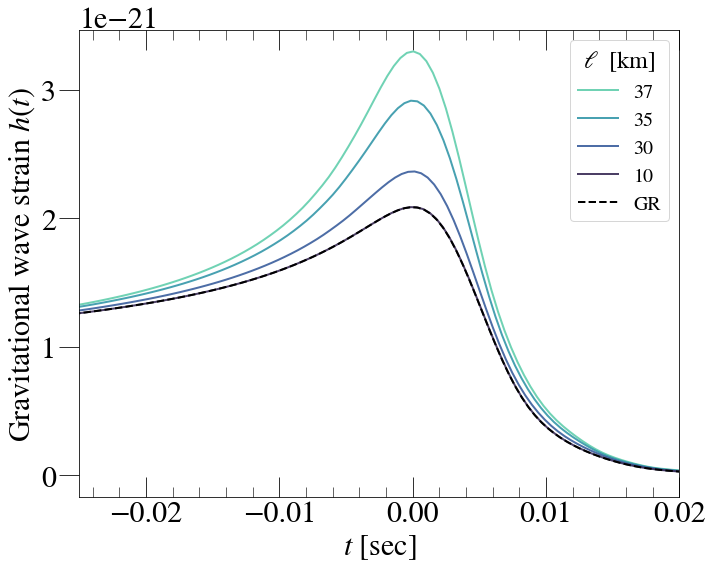

In [8]:
plt.figure(figsize=(10, 8))

params_dict = {'dist_mpc' : 400.0, 'mass' : 68.0, 'theta' : pi, 'phi' : 0, 'dt' : 1.0/2048}

ell_arr = [0.37, 0.35, 0.3, 0.1]
cs = sns.color_palette('mako_r', n_colors=len(ell_arr))

## dCS strains
for ell, c in zip(ell_arr, cs):
    
    name = str(ell).replace('.', 'p')
    file = 'Waveforms/Lev5/dCS_Strain_' + name + '.h5'
    
    ## Get physical value for ell 
    phys_ell_km = EllinKm(name, params_dict['mass'])

    time, h_plus, h_cross, h_amp = ReadExtrapolatedModes(file, params_dict)
    plt.plot(time, h_amp, lw=2.0, label=int(phys_ell_km), color=c, alpha=0.9)

## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev2/BackgroundStrain.h5', params_dict)
plt.plot(time, h_amp, lw=2.0, ls='--', label='GR', color='black')
    
plt.xlim(-0.025, 0.02)

plt.xlabel('$t$ [sec]', fontsize=30)
plt.ylabel('Gravitational wave strain $h(t)$', fontsize=30)
legend = plt.legend(title='$\ell$  [km]', fontsize=20)
plt.setp(legend.get_title(),fontsize=24)
plt.tight_layout()
plt.savefig('dCSWaveforms.pdf')
plt.show()


### Plot beyond-GR waveforms in detectors

t0 parameter:  1126259462.0
Time delay between detectors -0.006985699700979881
Not shifting or padding the time arrays
75.7522178644205
t0 parameter:  1126259462.0
Time delay between detectors -0.006985699700979881
Not shifting or padding the time arrays
86.8548840536366
t0 parameter:  1126259462.0
Time delay between detectors -0.006985699700979881
Not shifting or padding the time arrays
79.6179037273832
t0 parameter:  1126259462.0
Time delay between detectors -0.006985699700979881
Not shifting or padding the time arrays


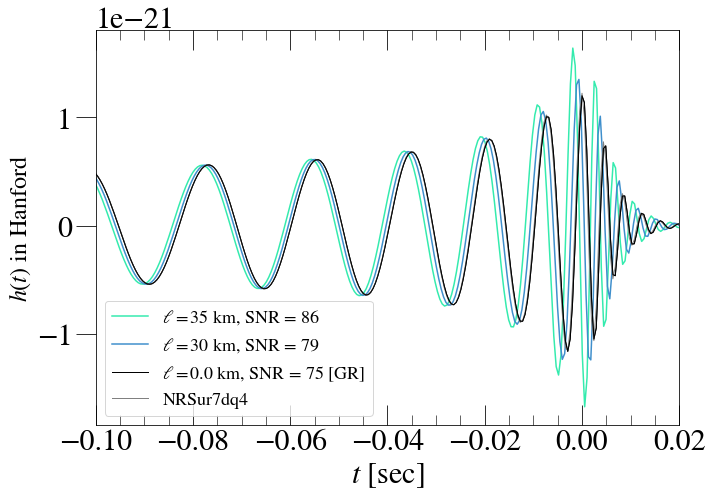

In [66]:
fig, ax = plt.subplots(figsize=(10, 7))

params_dict = {'dt' : 1/2048, 't_gps' : 1126259462.0, 'peak_time_in_segment' : 8.0, 'segment_length' : 16.0, \
               'dist_mpc' : 500.0, 'mass' : 68.0, 'q' : 1.2212532137858916, \
               'a_1' : [0, 0, 0.329892752405], 'a_2' : [0, 0, -0.439940981499], \
               'f_low' : 0, 'theta' : pi, 'phi' : 0, \
               'ra' : 1.952318922, 'dec' : -1.26967171703, 'pol' : 0.824043851821, 'f_ref' : 37.95,  'f_low' : 25.0}


## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev5/BackgroundStrain.h5', params_dict)
time_GR, hH_GR, time_GR, hL_GR = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
SNR_GR = ComputeMultiDetectorSNR(time_GR, hH_GR, time_GR, hL_GR)
print(SNR_GR)
t_peak = GetPeakTime(time_GR, hH_GR)

## dCS straints
ell_arr = [0.35, 0.3] #, 0.2]
colors = ['#34ebae', '#3f8fcc'] #, 'pink']

for ell, c in zip(ell_arr, colors):
    
    file = 'Waveforms/Lev5/dCS_Strain_' + EllString(ell) + '.h5'
    
    time, h_plus, h_cross, h_amp = ReadExtrapolatedModes(file, params_dict)
    time, hH, time, hL = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
    SNR = ComputeMultiDetectorSNR(time, hH, time, hL)
    print(SNR)
    plt.plot(time - t_peak, hH, lw=1.5, label='$\ell =  %.d$ km, SNR = %d' % (EllinKm(EllString(ell), params_dict['mass']), SNR), color=c)

## Plot GR strain
plt.plot(time_GR - t_peak, hH_GR, lw=1.0, ls='-', label='$\ell =  0.0$ km, SNR = %d [GR]' % SNR_GR, color='black')
    
## Surrogate model
time, h_plus, h_cross, h_amp = EvaluateSurrogate(sur, params_dict)
time_sur, hH_sur, time_sur, hL_sur = PadAndProject(time, h_plus, h_cross, params_dict, no_pad = True)
t_peak_sur = GetPeakTime(time_sur, hH_sur)
plt.plot(time_sur - t_peak_sur, hH_sur, lw=1.0, ls='-', label='NRSur7dq4', color='gray')

## Plot GR one more time so black is on top of everything but surrogate is last in the legend
plt.plot(time_GR - t_peak, hH_GR, lw=1.0, ls='-', color='black')
  
plt.xlim(-0.1, 0.02)
plt.ylabel(r'$h(t)$ in Hanford')
plt.xlabel('$t$ [sec]', fontsize=30)
legend = plt.legend(fontsize=18, loc = 'lower left', ncol=1, frameon=True)
plt.grid(False)
plt.tight_layout()
plt.savefig('InjectedWaveformsSameDist.pdf')
plt.show()